# Logistic Regression

## Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('breast_cancer.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            1                3                1        1      2  
1           10                3                2        1      2  
2            2                3                1        1      2  
3            4                3                7        1      2  
4            1                3                1        1      2

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [5]:
dataset.groupby('Class').describe()

Sample code number                                                    \
                   count          mean            std       min        25%   
Class                                                                        
2                  444.0  1.115261e+06  730035.873877  128059.0  1016064.0   
4                  239.0  1.005121e+06  322302.103201   63375.0   832396.5   

                                         Clump Thickness            ...  \
             50%         75%         max           count      mean  ...   
Class                                                               ...   
2      1180677.0  1257845.75  13454352.0           444.0  2.963964  ...   
4      1142706.0  1221955.00   1371026.0           239.0  7.188285  ...   

      Normal Nucleoli       Mitoses                                          \
                  75%   max   count      mean       std  min  25%  50%  75%   
Class                                                                         
2                 1.0   8.0   444.0  1.065315  0.509738  1.0  1.0  1.0  1.0   
4                 9.5  10.0   239.0  2.602510  2.564495  1.0  1.0  1.0  3.0   

             
        max  
Class        
2       8.0  
4      10.0  

[2 rows x 80 columns]

In [6]:
dataset.describe()

Sample code number  Clump Thickness  Uniformity of Cell Size  \
count        6.830000e+02       683.000000               683.000000   
mean         1.076720e+06         4.442167                 3.150805   
std          6.206440e+05         2.820761                 3.065145   
min          6.337500e+04         1.000000                 1.000000   
25%          8.776170e+05         2.000000                 1.000000   
50%          1.171795e+06         4.000000                 1.000000   
75%          1.238705e+06         6.000000                 5.000000   
max          1.345435e+07        10.000000                10.000000   

       Uniformity of Cell Shape  Marginal Adhesion  \
count                683.000000         683.000000   
mean                   3.215227           2.830161   
std                    2.988581           2.864562   
min                    1.000000           1.000000   
25%                    1.000000           1.000000   
50%                    1.000000           1.000000   
75%                    5.000000           4.000000   
max                   10.000000          10.000000   

       Single Epithelial Cell Size  Bare Nuclei  Bland Chromatin  \
count                   683.000000   683.000000       683.000000   
mean                      3.234261     3.544656         3.445095   
std                       2.223085     3.643857         2.449697   
min                       1.000000     1.000000         1.000000   
25%                       2.000000     1.000000         2.000000   
50%                       2.000000     1.000000         3.000000   
75%                       4.000000     6.000000         5.000000   
max                      10.000000    10.000000        10.000000   

       Normal Nucleoli     Mitoses       Class  
count       683.000000  683.000000  683.000000  
mean          2.869693    1.603221    2.699854  
std           3.052666    1.732674    0.954592  
min           1.000000    1.000000    2.000000  
25%           1.000000    1.000000    2.000000  
50%           1.000000    1.000000    2.000000  
75%           4.000000    1.000000    4.000000  
max          10.000000   10.000000    4.000000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

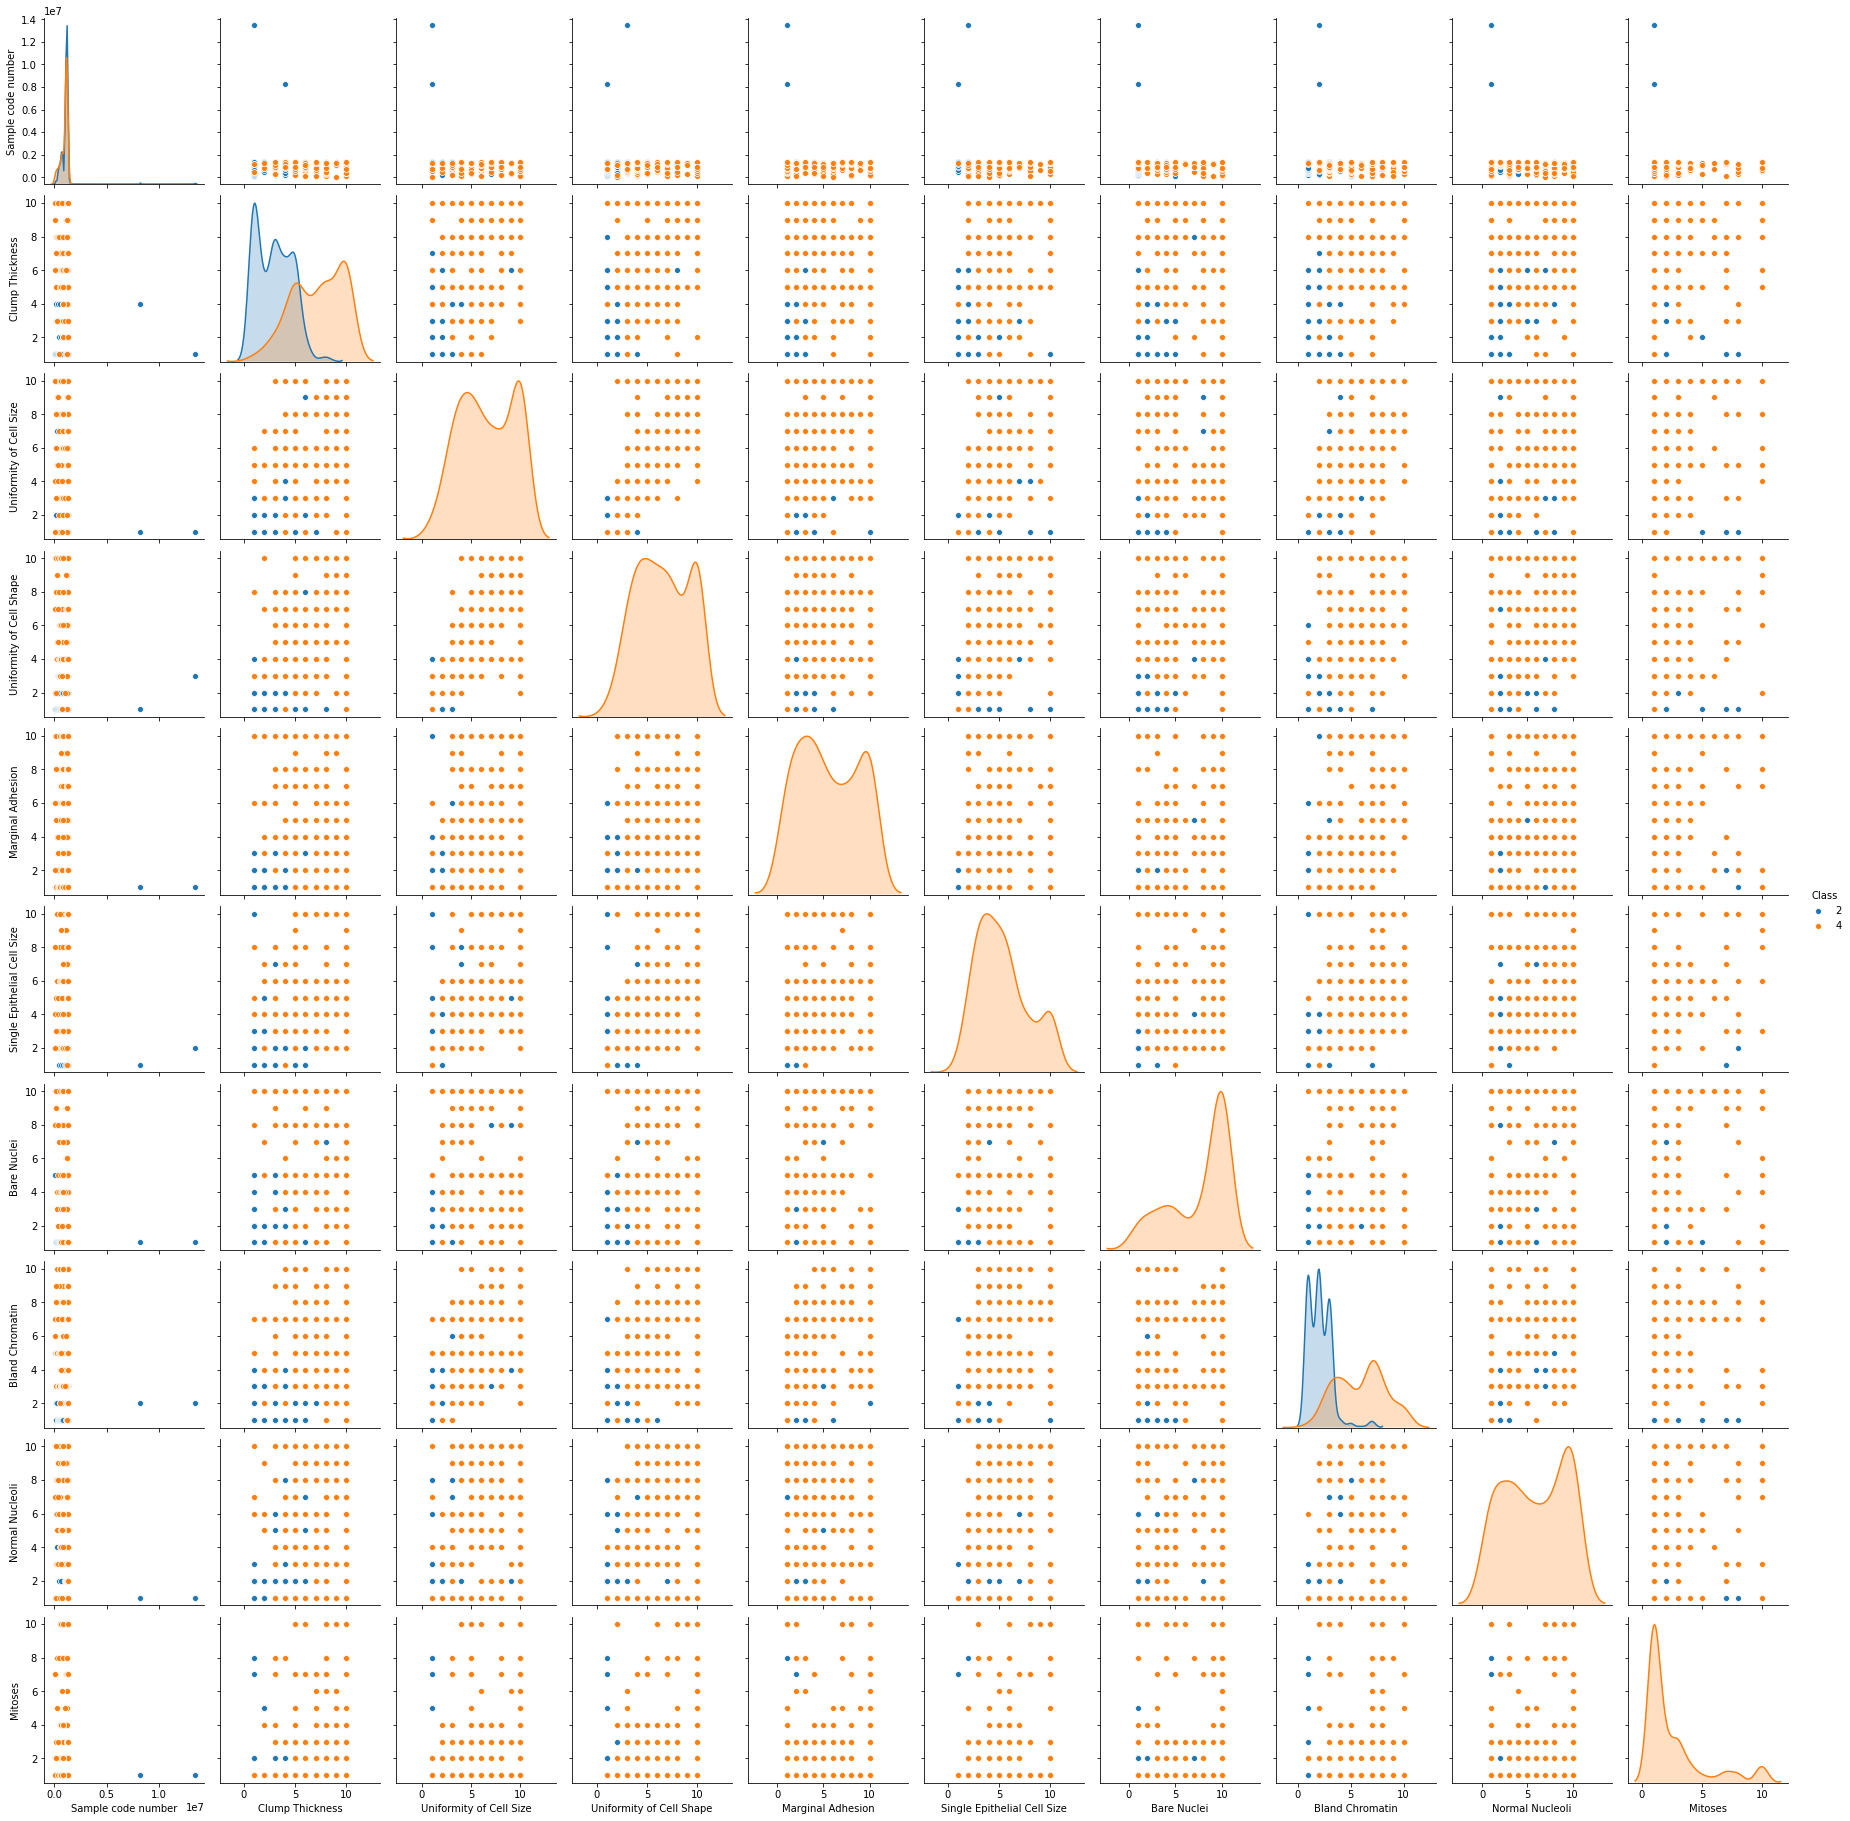

In [17]:
sns.distplot(a=None, bins=None, hist=True, kde=True, x=None)

In [8]:
sns.heatmap(dataset.drop('Sample code number', axis= 1).corr(), annot = True, fmt = ".2f")

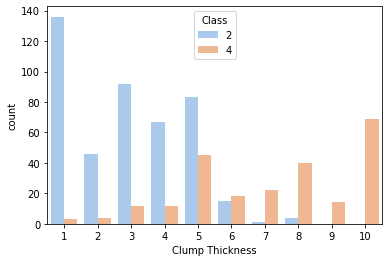

In [9]:
 sns.countplot(data=dataset, x='Clump Thickness', palette="pastel", hue= 'Class')

In [10]:
dataset.groupby('Class').describe()

Sample code number                                                    \
                   count          mean            std       min        25%   
Class                                                                        
2                  444.0  1.115261e+06  730035.873877  128059.0  1016064.0   
4                  239.0  1.005121e+06  322302.103201   63375.0   832396.5   

                                         Clump Thickness            ...  \
             50%         75%         max           count      mean  ...   
Class                                                               ...   
2      1180677.0  1257845.75  13454352.0           444.0  2.963964  ...   
4      1142706.0  1221955.00   1371026.0           239.0  7.188285  ...   

      Normal Nucleoli       Mitoses                                          \
                  75%   max   count      mean       std  min  25%  50%  75%   
Class                                                                         
2                 1.0   8.0   444.0  1.065315  0.509738  1.0  1.0  1.0  1.0   
4                 9.5  10.0   239.0  2.602510  2.564495  1.0  1.0  1.0  3.0   

             
        max  
Class        
2       8.0  
4      10.0  

[2 rows x 80 columns]

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Logistic Regression model on the Training set

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [13]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84  3]
 [ 3 47]]


## Computing the accuracy with k-Fold Cross Validation

In [15]:
from sklearn.model_selection import cross_val_score
accuracies_train = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)  # 10 is the number of fold -- K-fold
print("Accuracy_Train: {:.2f} %".format(accuracies_train.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_train.std()*100))

Accuracy_Train: 96.70 %
Standard Deviation: 1.97 %


In [16]:
accuracies_test = cross_val_score(estimator = classifier, X = X_test, y = y_test, cv = 10)
print("Accuracy_Test: {:.2f} %".format(accuracies_test.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_test.std()*100))

Accuracy_Test: 96.32 %
Standard Deviation: 3.69 %
